In [242]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import math
import datetime as dt
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [243]:
def get_AR_props(list_file, data_file, Needed_where, average_over):
    """ Needed_where: How much ahead AR properties are needed in hours  
        average_over: What should be the averaging window centered on this time in hours """
    Data_flare = pd.read_csv(data_file,header=0, delimiter=r"\s+")
    Data_flare['T_REC'] =  pd.to_datetime(Data_flare['T_REC'], format='%Y.%m.%d_%H:%M:%S.000_TAI')
    Data_columns = Data_flare.columns
    flare_list = pd.read_csv(list_file,header=0)
    flare_list['time_start'] =  pd.to_datetime(flare_list['time_start'], format='%Y-%m-%d %H:%M:%S')
    for index, row in flare_list.iloc[0:, :].iterrows():
        AR = row['nar']
        time_range_lo = row['time_start'] - timedelta(hours=(Needed_where+average_over/2))
        time_range_hi = row['time_start'] - timedelta(hours=(Needed_where-average_over/2))
        filter = (Data_flare["T_REC"] <= time_range_hi) & (Data_flare["T_REC"] >= time_range_lo) & (Data_flare["NOAA_AR"] == AR) & (Data_flare["QUALITY"] == 0) \
                 & (abs(0.5*(Data_flare["LONMIN"] + Data_flare["LONMAX"])) <= 60) & (abs(0.5*(Data_flare["LATMIN"] + Data_flare["LATMAX"])) <= 60) 
        needed_slice = Data_flare.where(filter).dropna()
        needed_slice = needed_slice.replace(0, np.NaN)
        needed_slice_avg = pd.DataFrame([needed_slice.mean(axis=0)])
        for column in Data_columns:
            if (column != 'T_REC' and column != 'NOAA_AR'):
                flare_list.loc[index,column] = needed_slice_avg.loc[0,column]
    return(flare_list)            
 

In [244]:
folder_path = '/Users/talwinder/Library/Mobile Documents/com~apple~CloudDocs/Desktop/My_Computer/Work/UAH/Current_projects/Flare_forecast/Programs/Python_code_to_analyse_AR_parameters/'
No_flare_data = get_AR_props(folder_path+'List_No_flare.txt',folder_path+'Data_no_flare.txt',12,6)

In [245]:
onlyB_flare_data = get_AR_props(folder_path+'List_onlyB.txt',folder_path+'Data_onlyB.txt',12,6)

In [246]:
MX_flare_data = get_AR_props(folder_path+'List_MX.txt',folder_path+'Data_MX.txt',12,6)

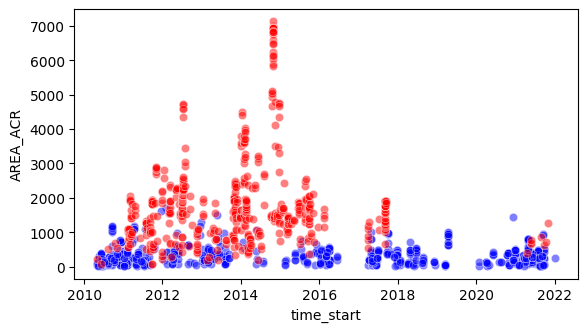

In [247]:
f, ax = plt.subplots(figsize=(6.5, 3.5))
# plt.ylim(0, 10000)
# plt.xlim(0, 100)
# ax = sns.scatterplot(data = No_flare_data, x = 'time_start', y="AREA_ACR", ax=ax,color='g', alpha=0.5)
ax = sns.scatterplot(data = onlyB_flare_data, x = 'time_start', y="AREA_ACR", ax=ax,color='b', alpha=0.5)
ax = sns.scatterplot(data = MX_flare_data, x = 'time_start', y="AREA_ACR", ax=ax,color='r', alpha=0.5)
plt.show()